<a href="https://colab.research.google.com/github/waltermayor/rescityUAO/blob/master/PreprocesamientoDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pandas
! pip install sodapy

In [ ]:
import pandas as pd
import copy
import seaborn as sns
import numpy as np
from sodapy import Socrata

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Base de datos inundaciones

In [ ]:
client = Socrata("www.datos.gov.co", None)
results = client.get("es7m-wj39", limit=2000)
dataAll = pd.DataFrame.from_records(results)


In [ ]:
dataAll.dtypes

fecha              object
departamento       object
municipio          object
evento             object
personas           object
familias           object
viviendasaver      object
viviendasdestru    object
dtype: object

In [ ]:
dataAll['fecha'] = dataAll['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
dataAll.dtypes

fecha              datetime64[ns, UTC]
departamento                    object
municipio                       object
evento                          object
personas                        object
familias                        object
viviendasaver                   object
viviendasdestru                 object
dtype: object

In [ ]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   fecha            2000 non-null   datetime64[ns, UTC]
 1   departamento     2000 non-null   object             
 2   municipio        2000 non-null   object             
 3   evento           2000 non-null   object             
 4   personas         1030 non-null   object             
 5   familias         1023 non-null   object             
 6   viviendasaver    886 non-null    object             
 7   viviendasdestru  154 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 125.1+ KB


**Observar datos faltantes** 

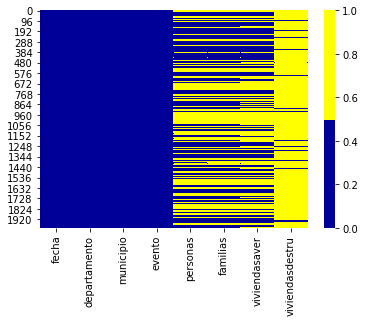

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataInundAll.columns:
    pct_missing = np.mean(dataInundAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha - 0.0%
departamento - 0.0%
municipio - 0.0%
evento - 0.0%
personas - 48.0%
familias - 49.0%
viviendasaver - 56.0%
viviendasdestru - 92.0%
personas_ismissing - 0.0%
familias_ismissing - 0.0%
viviendasaver_ismissing - 0.0%
viviendasdestru_ismissing - 0.0%
num_missing - 0.0%


**Filtrar datos solo para cali**

In [ ]:
#filtrar datos solo para cali
dataCali=dataAll[dataAll['municipio']=="CALI"]
print(dataCali)

14
                        fecha     departamento  ... viviendasaver viviendasdestru
63    2013-09-16T00:00:00.000  VALLE DEL CAUCA  ...            15             NaN
276   2013-05-27T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
311   2013-05-20T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
383   2013-04-29T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
505   2013-02-24T00:00:00.000  VALLE DEL CAUCA  ...             4             NaN
658   2012-10-23T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
1197  2012-05-06T00:00:00.000  VALLE DEL CAUCA  ...            20             NaN
1238  2012-04-28T00:00:00.000  VALLE DEL CAUCA  ...            40             NaN
1340  2012-04-22T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
1399  2012-04-18T00:00:00.000  VALLE DEL CAUCA  ...           NaN             NaN
1601  2012-03-25T00:00:00.000  VALLE DEL CAUCA  ...           200             NaN
1662  2012-03

### Base de datos presipitaciones y temperatura media 1981-2010


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("nsxu-h2dh", limit=1000)
dataAll = pd.DataFrame.from_records(results)

In [ ]:
dataAll.head(100)

,codigo,nombre,categoria,departamento,municipio,corriente,lag,lam,las,lac,log,lom,los,loc,altitud,enepreci30a,febpreci30a,marpreci30a,abrpreci30a,maypreci30a,junpreci30a,julpreci30a,agopreci30a,seppreci30a,octpreci30a,novpreci30a,dicpreci30a,totalpreci30a,enetemp30a,febtemp30a,martemp30a,abrtemp30a,maytemp30a,juntemp30a,jultemp30a,agotemp30a,septemp30a,octtemp30a,novtemp30a,dictemp30a,protemp30a
0,22075030,Riomanso,CO,Tolima,Rovira,Manso,4,12,5.8,N,75,17,4.1,W,2020,97.2,125.1,165.7,215.1,213.2,146.9,115.6,107.1,151.9,185.7,179.6,125.1,1822.2,16.7,16.9,17.0,17.2,17.2,17.0,16.8,17.1,17.2,17.0,16.8,16.8,17.0
1,27015150,Progreso El Hda,CO,Antioquia,Barbosa,Medellin,6,24,50.0,N,75,23,48.0,W,1500,57.5,80.1,113.2,188.6,246.8,199.1,207.6,202.3,234.2,235.4,155.0,83.3,2003.0,21.9,22.2,22.3,22.1,22.1,22.2,22.1,22.2,22.0,21.7,21.7,21.7,22.0
2,21206260,C.Univ.Agrop-Udca,CO,Bogota DC,Bogota DC,BOGOTA,4,47,55.1,N,74,2,59.0,W,2570,33.3,51.3,73.3,83.7,96.9,58.0,54.1,48.3,53.1,101.0,95.3,53.9,768.9,13.8,13.9,14.0,14.0,14.1,14.0,13.8,13.8,13.7,13.8,13.8,13.9,13.9
3,35095030,Tunel El,CO,Boyaca,Cuitiva,Lag de Tota,5,34,19.6,N,72,56,38.2,W,3000,17.1,30.4,57.2,95.7,87.8,70.1,77.9,58.8,62.5,87.2,81.4,23.9,749.9,11.6,11.7,11.8,11.8,11.8,11.4,10.9,10.9,11.2,11.4,11.6,11.8,11.5
4,28035010,Villa Rosa,CO,Cesar,Valledupar,Diluvio,10,11,34.0,N,73,32,50.0,W,70,18.0,10.2,69.3,137.3,167.0,137.3,105.5,154.9,183.8,193.1,132.4,38.2,1344.1,29.4,30.2,30.3,29.6,29.0,28.8,29.2,29.0,28.0,27.7,27.8,28.3,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26095230,Vinculo El,AM,Valle del Cauca,Guadalajara de Buga,Sonsito,3,50,6.7,N,76,17,58.3,W,979,65.6,73.3,124.0,155.6,123.5,68.1,50.7,60.2,101.7,164.9,133.8,85.0,1206.3,23.7,24.0,24.0,23.6,23.5,23.4,23.7,24.0,23.8,23.2,23.1,23.3,23.6
96,44045020,Valparaiso,CO,Caqueta,Valparaiso,Pescado,1,11,42.9,N,75,42,16.1,W,270,125.0,212.4,282.0,388.2,360.7,351.0,332.8,237.2,218.1,230.7,214.3,129.9,3028.4,26.9,26.6,26.3,25.8,25.7,25.3,25.2,25.6,26.1,26.4,26.5,26.6,26.1
97,23085110,Penol El,CO,Antioquia,Penol,Rionegro,6,12,51.3,N,75,14,28.8,W,1956,113.2,112.0,181.0,270.2,296.6,201.4,207.7,236.8,295.5,317.6,220.4,153.2,2605.6,17.8,18.0,18.1,18.3,18.6,18.8,18.7,18.7,18.3,18.0,17.8,17.7,18.2
98,24025030,Sierra La,CP,Boyaca,Duitama,La Rucia,5,58,1.3,N,73,9,43.6,W,2700,119.7,138.5,208.9,249.9,210.8,91.5,75.3,88.6,137.1,251.6,216.0,128.3,1907.5,11.9,12.0,12.1,12.3,12.4,12.3,12.2,12.3,12.1,11.9,11.9,11.9,12.1


In [ ]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codigo         450 non-null    object
 1   nombre         450 non-null    object
 2   categoria      450 non-null    object
 3   departamento   450 non-null    object
 4   municipio      450 non-null    object
 5   corriente      450 non-null    object
 6   lag            450 non-null    object
 7   lam            450 non-null    object
 8   las            450 non-null    object
 9   lac            450 non-null    object
 10  log            450 non-null    object
 11  lom            450 non-null    object
 12  los            450 non-null    object
 13  loc            450 non-null    object
 14  altitud        450 non-null    object
 15  enepreci30a    450 non-null    object
 16  febpreci30a    450 non-null    object
 17  marpreci30a    450 non-null    object
 18  abrpreci30a    450 non-null   

**Observar datos faltantes** 

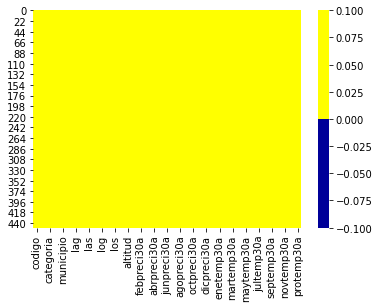

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigo - 0.0%
nombre - 0.0%
categoria - 0.0%
departamento - 0.0%
municipio - 0.0%
corriente - 0.0%
lag - 0.0%
lam - 0.0%
las - 0.0%
lac - 0.0%
log - 0.0%
lom - 0.0%
los - 0.0%
loc - 0.0%
altitud - 0.0%
enepreci30a - 0.0%
febpreci30a - 0.0%
marpreci30a - 0.0%
abrpreci30a - 0.0%
maypreci30a - 0.0%
junpreci30a - 0.0%
julpreci30a - 0.0%
agopreci30a - 0.0%
seppreci30a - 0.0%
octpreci30a - 0.0%
novpreci30a - 0.0%
dicpreci30a - 0.0%
totalpreci30a - 0.0%
enetemp30a - 0.0%
febtemp30a - 0.0%
martemp30a - 0.0%
abrtemp30a - 0.0%
maytemp30a - 0.0%
juntemp30a - 0.0%
jultemp30a - 0.0%
agotemp30a - 0.0%
septemp30a - 0.0%
octtemp30a - 0.0%
novtemp30a - 0.0%
dictemp30a - 0.0%
protemp30a - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundCali=dataAll[dataAll['departamento']=="Valle del Cauca"]
dataInundCali.head(22)
#print(dataInundCali['municipio'])

450


,codigo,nombre,categoria,departamento,municipio,corriente,lag,lam,las,lac,log,lom,los,loc,altitud,enepreci30a,febpreci30a,marpreci30a,abrpreci30a,maypreci30a,junpreci30a,julpreci30a,agopreci30a,seppreci30a,octpreci30a,novpreci30a,dicpreci30a,totalpreci30a,enetemp30a,febtemp30a,martemp30a,abrtemp30a,maytemp30a,juntemp30a,jultemp30a,agotemp30a,septemp30a,octtemp30a,novtemp30a,dictemp30a,protemp30a
35,54035020,Argelia El Recreo,CO,Valle del Cauca,Argelia,Las Vueltas,4,44,0.0,N,76,7,0.0,W,1600,79.8,80.3,112.9,170.1,167.7,106.5,94.9,86.4,126.5,184.0,148.2,91.8,1438.7,20.6,20.7,20.6,20.5,20.5,20.6,20.4,20.6,20.5,20.1,20.3,20.4,20.4
41,53115030,Julio Fernandez,CO,Valle del Cauca,Restrepo,Grande,3,49,0.0,N,76,31,0.0,W,1360,49.4,67.6,76.4,130.3,128.1,84.7,59.5,65.6,106.5,145.2,108.5,66.0,1087.8,20.0,20.2,20.3,20.3,20.2,20.2,19.9,20.1,19.9,19.6,19.7,19.8,20.0
46,54075040,Mision La,CO,Valle del Cauca,Buenaventura,San Juan,4,13,21.1,N,77,16,34.7,W,5,418.1,272.5,337.3,458.0,642.6,612.6,690.0,760.8,819.6,790.0,728.5,675.8,7205.9,25.6,26.0,26.1,26.1,26.1,25.8,25.8,25.7,25.5,25.3,25.2,25.3,25.7
84,26125130,Cumbarco,CO,Valle del Cauca,Sevilla,La Vieja,4,11,6.1,N,75,49,56.5,W,1692,158.2,152.7,228.9,277.5,251.3,143.4,102.6,94.9,190.8,335.5,279.0,208.4,2423.2,18.9,19.0,18.8,18.8,18.8,19.0,19.2,19.4,19.0,18.5,18.4,18.6,18.9
95,26095230,Vinculo El,AM,Valle del Cauca,Guadalajara de Buga,Sonsito,3,50,6.7,N,76,17,58.3,W,979,65.6,73.3,124.0,155.6,123.5,68.1,50.7,60.2,101.7,164.9,133.8,85.0,1206.3,23.7,24.0,24.0,23.6,23.5,23.4,23.7,24.0,23.8,23.2,23.1,23.3,23.6
107,26105110,Ing Riopaila,CO,Valle del Cauca,Zarzal,CAUCA,4,19,5.6,N,76,4,56.7,W,941,57.1,74.9,142.1,156.6,173.3,107.4,83.8,77.6,98.3,147.9,135.7,102.0,1346.7,24.5,24.9,24.7,24.2,24.1,24.1,24.3,24.5,24.4,24.1,24.0,24.0,24.3
111,26095080,Tenerife,CO,Valle del Cauca,El Cerrito,Amaime,3,43,47.8,N,76,4,29.4,W,2609,95.6,80.2,123.3,135.6,108.6,55.1,41.0,42.6,72.1,168.0,158.1,129.7,1209.8,13.4,13.5,13.7,13.8,13.9,13.9,13.8,13.9,13.7,13.5,13.3,13.3,13.6
125,26105140,Barragan,CO,Valle del Cauca,Tulua,Bugalagrande,4,2,0.0,N,75,53,17.0,W,2902,76.0,68.7,99.4,108.8,98.4,47.3,34.1,38.3,61.4,141.2,129.6,88.1,975.1,11.7,11.8,11.9,12.0,12.2,12.0,11.7,11.8,11.7,11.4,11.3,11.5,11.7
147,53115020,Colpuertos,CP,Valle del Cauca,Buenaventura,Pacifico,3,53,0.0,N,77,4,0.0,W,10,410.4,307.1,384.5,552.1,667.0,581.9,685.2,818.6,911.3,881.5,788.0,653.2,7609.0,26.2,26.6,26.7,26.7,26.6,26.3,26.3,26.2,26.0,25.9,25.9,26.1,26.3
150,53115010,Apto Buenaventura,SP,Valle del Cauca,Buenaventura,Pacifico,3,49,12.7,N,76,59,32.4,W,14,413.9,290.9,392.7,530.2,618.9,533.3,578.3,666.2,781.2,807.3,713.9,571.4,6898.2,25.8,26.1,26.4,26.4,26.3,26.0,25.9,26.0,25.9,25.7,25.6,25.7,26.0


## Base de datos desastres naturales 1999-2013


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("dzam-ffve", limit=5000)
dataAll = pd.DataFrame.from_records(results)

In [ ]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               5000 non-null   object
 1   departamento        5000 non-null   object
 2   municipio           5000 non-null   object
 3   evento              5000 non-null   object
 4   desapa              38 non-null     object
 5   subsidiodearriendo  3427 non-null   object
 6   menajes             5000 non-null   object
 7   apaliment           5000 non-null   object
 8   materialesconst     5000 non-null   object
 9   sacos               5000 non-null   object
 10  transeconomicas     5000 non-null   object
 11  recejecutados       5000 non-null   object
 12  personas            2045 non-null   object
 13  familias            1939 non-null   object
 14  viviendasaver       1639 non-null   object
 15  heridos             271 non-null    object
 16  otros               136 

**Observar datos faltantes** 

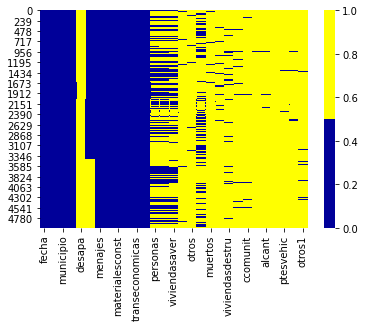

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha - 0.0%
departamento - 0.0%
municipio - 0.0%
evento - 0.0%
heridos - 94.0%
personas - 57.0%
otros - 97.0%
subsidiodearriendo - 0.0%
menajes - 0.0%
apaliment - 0.0%
materialesconst - 0.0%
sacos - 0.0%
transeconomicas - 0.0%
recejecutados - 0.0%
desapa - 99.0%
familias - 61.0%
viviendasaver - 66.0%
vias - 96.0%
muertos - 95.0%
hectareas - 68.0%
viviendasdestru - 91.0%
ceducat - 96.0%
ccomunit - 98.0%
ptepeat - 98.0%
alcant - 99.0%
csalud - 99.0%
ptesvehic - 100.0%
acued - 99.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundCali=dataAll[dataAll['municipio']=="CALI"]
dataInundCali.head(9)
#print(dataInundCali)

1000


,fecha,departamento,municipio,evento,heridos,personas,otros,subsidiodearriendo,menajes,apaliment,materialesconst,sacos,transeconomicas,recejecutados,desapa,familias,viviendasaver,vias,muertos,hectareas,viviendasdestru,ceducat,ccomunit,ptepeat,alcant,csalud,ptesvehic,acued
131,2013-10-05T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO ESTRUCTURAL,NaN,NaN,6,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2013-10-03T00:00:00.000,VALLE DEL CAUCA,CALI,DESLIZAMIENTO,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,2013-09-24T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,2013-09-16T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,1,75,NaN,0,0,0,0,0,0,0,NaN,15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,2013-08-30T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,2013-08-26T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,2013-08-25T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,2013-08-19T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,2013-08-03T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Base de datos Humedad del Aire 2 metros


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("uext-mhny", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

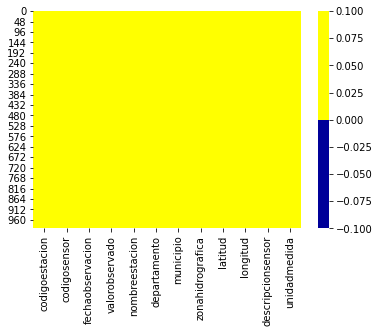

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Temperatura Maxima del Aire 2 metros


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("ccvq-rp9s", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

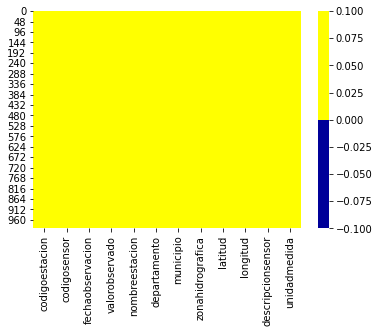

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Velocidad Viento


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("sgfv-3yp8", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

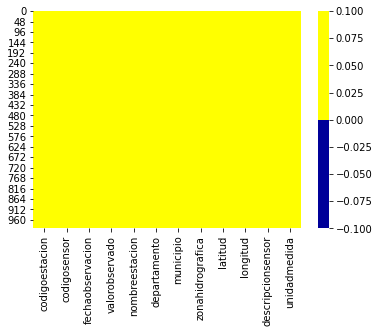

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Nivel Maximo del rio


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("vfth-yucv", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

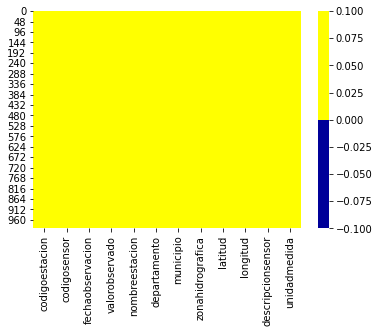

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Reporte Calidad Del Agua 2015 - 2018 en la ciudad de Santiago de Cali


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("x3ds-vaid", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

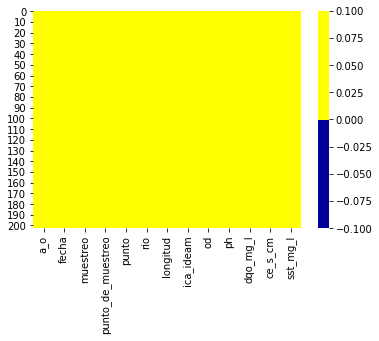

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

a_o - 0.0%
fecha - 0.0%
muestreo - 0.0%
punto_de_muestreo - 0.0%
punto - 0.0%
rio - 0.0%
longitud - 0.0%
ica_ideam - 0.0%
od - 0.0%
ph - 0.0%
dqo_mg_l - 0.0%
ce_s_cm - 0.0%
sst_mg_l - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]
